# Introduction

Optimization algorithms are at the heart of machine learning and deep learning. They are used to minimize (or maximize) a loss (or objective) function by iteratively updating the model's parameters.

## Key Concepts

* **Objective Function:** The objective or the loss function measures how well your model is performing. It quantifies the difference between the predicted output and the actual target.

* **Goal of Optimization:** Minimize the loss function.

* **Variables:** The following are the Parameters or the internal variables of the model that are learned during training (e.g., weights in a neural network).
* **Constraints:** Constraints to be met by the solution.
* **Feasible Region:** The subset of all potential solutions that are viable given the constraints in place.
* **Gradient:** It is a vector of partial derivatives of the loss function with respect to each parameter.
* The **learning rate** (η) controls the step size of parameter updates during optimization.
* **Convex Functions:** Have a single global minimum. Optimization is easier because gradient descent will always find the global minimum.
* **Non-Convex Functions:** Have multiple local minima. Optimization is harder because gradient descent might get stuck in a local minimum.
* **Local Minima:** Points where the loss function is lower than in the immediate neighborhood but not the global minimum.
* **Saddle Points:** Points where the gradient is zero but are neither a local minimum nor a maximum. These can slow down optimization.
* **Regularization techniques** prevent overfitting by adding a penalty to the loss function.
* **Backpropagation** is the process of computing gradients in neural networks using the chain rule of calculus.
* **Epoch:** One full pass through the entire training dataset.
* **Iteration:** One update of the model's parameters (e.g., processing one mini-batch).
* **Bias:** Error due to overly simplistic assumptions in the model (underfitting).
* **Variance:** Error due to the model's sensitivity to small fluctuations in the training set (overfitting).
* **Vanishing Gradients:** Gradients become very small, slowing down learning (common in deep networks).
* **Exploding Gradients:** Gradients become very large, causing unstable updates.
* Hyperparameters are settings that control the optimization process and model behavior. Examples:
  1. Learning rate.
  2. Batch size.
  3. Number of epochs.
  4. Momentum term.
* **Convergence** occurs when the optimization algorithm finds a set of parameters that minimize the loss function.
* **Early stopping** is a regularization technique that stops training when the validation loss stops improving, preventing overfitting.

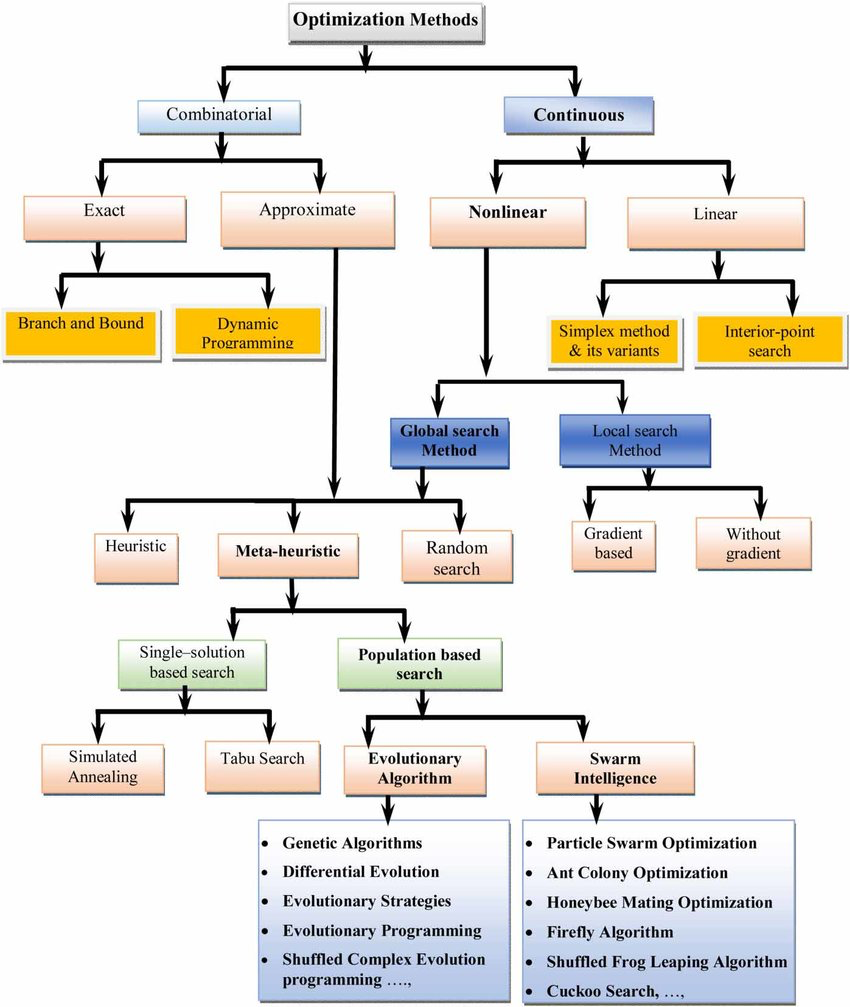

## First-Order Optimization Algorithms

These algorithms use only the first derivative (gradient) of the loss function.

**(a) Gradient Descent (GD)**

A fundamental optimization technique that updates model parameters in the direction of the negative gradient.

Update Rule: θ=θ−α∇J(θ)

1. **Batch Gradient Descent (BGD):** Computes gradient using the entire dataset. Slower but converges smoothly.
2. **Stochastic Gradient Descent (SGD):** Updates parameters after each training example. Faster but noisy.
3. **Mini-batch Gradient Descent:** Compromise between BGD and SGD, using small batches of data.

**(b) Adaptive Gradient Methods**

These methods adjust the learning rate dynamically.

1. **Momentum:** Uses past gradients to smooth updates.
2. **Nesterov Accelerated Gradient (NAG):** Similar to momentum but anticipates the next position before computing the gradient.
3. **Adagrad:** Adapts learning rates per parameter based on historical gradients.
4. **RMSprop:** Addresses Adagrad’s rapid learning rate decay by using an exponentially weighted moving average.
5. **Adam (Adaptive Moment Estimation):** Combines momentum and RMSprop for adaptive learning rates.
____

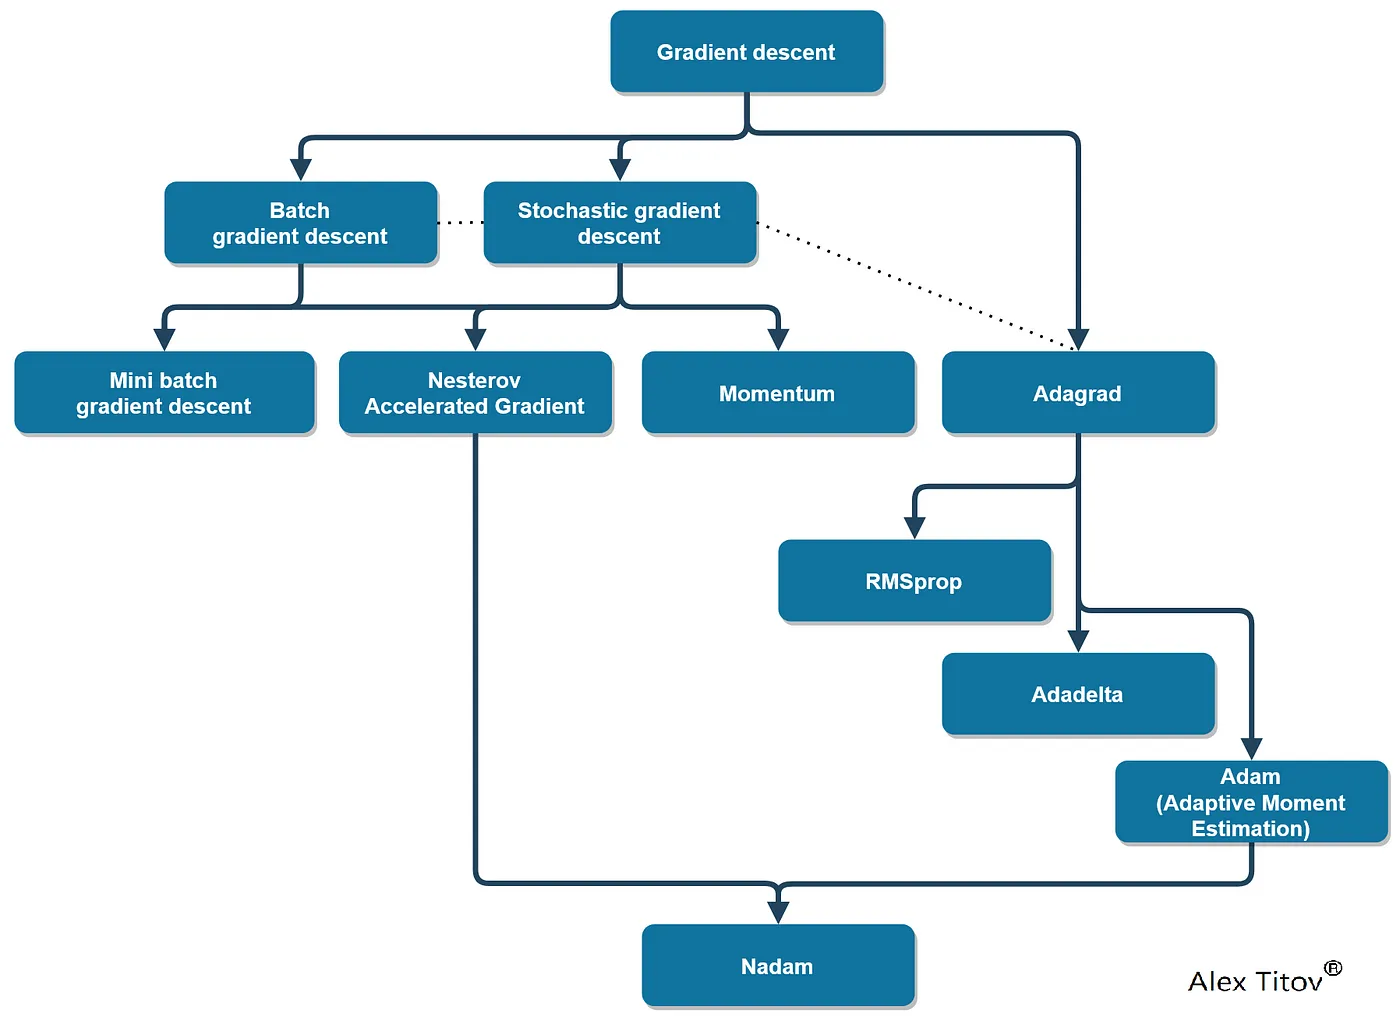

## Second-Order Optimization Algorithms

These use both the first and second derivatives (Hessian matrix) for optimization.

1. **Newton’s Method:** Uses second-order Taylor expansion but is computationally expensive.
2. **Quasi-Newton Methods (e.g., BFGS, L-BFGS):** Approximates Hessian instead of computing it directly. Useful for small datasets.
____

## Metaheuristic Optimization Algorithms

These are global optimization methods often used when gradient-based techniques fail.

1. **Genetic Algorithms (GA):** Evolutionary strategy inspired by natural selection.
2. **Simulated Annealing (SA):** Mimics the cooling process of metals.
3. **Particle Swarm Optimization (PSO):** Inspired by bird flocking behavior.
4. **Bayesian Optimization:** Efficient for hyperparameter tuning.
____

## Choosing the Right Optimization Algorithm

Choosing the right optimization algorithm depends on factors like the **problem type**, **dataset size**, **model complexity**, and **computational resources**.

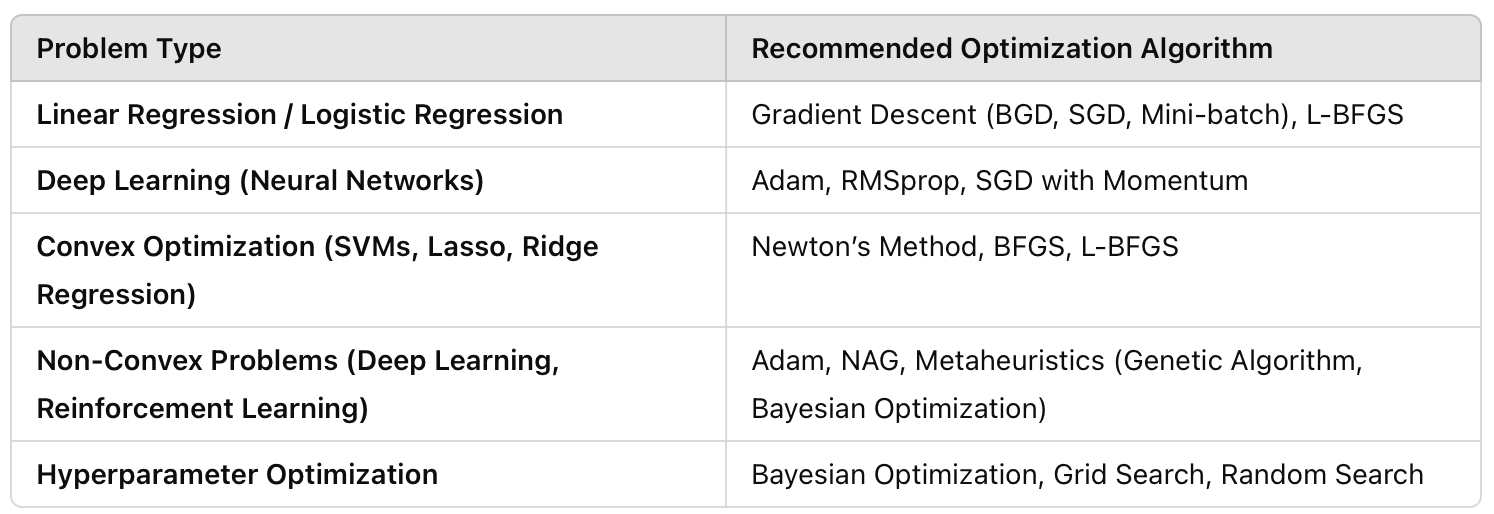
___

# Gradient Descent

Gradient Descent is one of the most fundamental optimization algorithms in machine learning and deep learning.

It is used to minimize a loss (or cost) function by iteratively adjusting the parameters of a model.
___

### Mathematical Formulation

The loss function J(θ) depends on the model's parameters θ. The goal is to find the values of θ that minimize J(θ).

**Gradient:** The gradient ∇J(θ) is a vector of partial derivatives of J(θ) with respect to each parameter θ.

**Update Rule:**
  θ = θ − η⋅∇J(θ)

θ: Model parameters.

η: Learning rate (step size).

∇J(θ): Gradient of the loss function with respect to θ.
___

### Algorithm

* let, learning_rate = 0.001
1. Computing the gradient (derivative) of the loss function with respect to the model's parameters.
  * Find the gradient using loss.backward()
2. Updating the parameters in the opposite direction of the gradient (since the gradient points in the direction of steepest ascent).
  * Get the parameter using
      * w = model.linear.weight and
      * b = model.linear.bias
  * Update the model parameter
        * w = w - learning_rate * w.grad
        * b = b - learning_rate * b.grad
  * assign the weight & bias parameter to the linear layer
      * model.linear.weight = nn.Parameter(w)
      * model.linear.bias   = nn.Parameter(b)
3. Repeating this process until the algorithm converges to a minimum.

## Implementation of Gradient Descent for linear regression

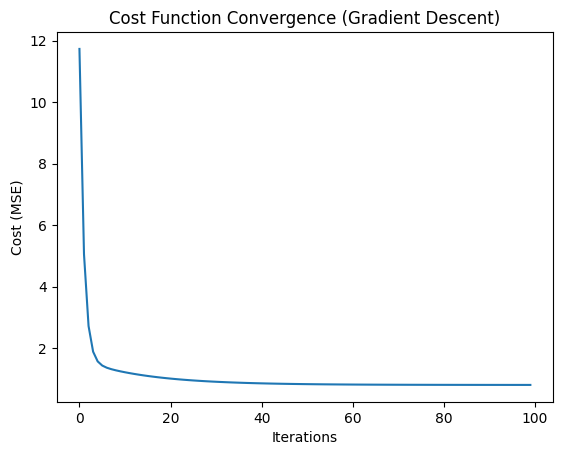

Cost at 100th epoch:  0.8074669076216543


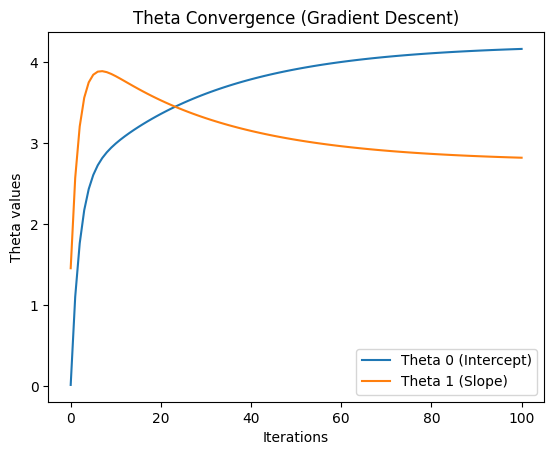

Optimal parameters: [[4.16104533]
 [2.81783733]]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Add bias term (intercept)
X_b = np.c_[np.ones((100, 1)), X]

# Initialize parameters
theta = np.random.randn(2, 1)

# Hyperparameters
learning_rate = 0.1
n_iterations = 100

cost_history = []
theta_history = [theta]
m = len(y)

# Gradient Descent
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - learning_rate * gradients
    cost = (1/m) * np.sum((X_b.dot(theta) - y) ** 2)  # Compute cost (MSE)
    cost_history.append(cost)
    theta_history.append(theta)


# Plot cost function over iterations
plt.plot(cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost (MSE)")
plt.title("Cost Function Convergence (Gradient Descent)")
plt.show()

print('Cost at 100th epoch: ', cost_history[-1])

# Extract theta values for plotting
theta_0_vals = [t[0][0] for t in theta_history]
theta_1_vals = [t[1][0] for t in theta_history]

plt.plot(theta_0_vals, label="Theta 0 (Intercept)")
plt.plot(theta_1_vals, label="Theta 1 (Slope)")
plt.xlabel("Iterations")
plt.ylabel("Theta values")
plt.title("Theta Convergence (Gradient Descent)")
plt.legend()
plt.show()

print("Optimal parameters:", theta)

In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# set random seed for reproducibility
torch.manual_seed(42)

# set number of samples
num_samples = 1000

# create random features with 2 dimensions
x = torch.randn(num_samples, 2)

# create random weights and bias for the linear regression model
true_weights = torch.tensor([1.3, -1])
true_bias    = torch.tensor([-3.5])

# Target variable
y = x @ true_weights.T + true_bias


# Define the model
class LinearRegression(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        out = self.linear(x)
        return out


# Define the input and output dimensions
input_size = x.shape[1]
output_size = 1

# Instantiate the model
model = LinearRegression(input_size, output_size)

# create a random weight & bias tensor
weight = torch.randn(1, input_size)
bias   = torch.rand(1)

# create a nn.Parameter object from the weight & bias tensor
weight_param = nn.Parameter(weight)
bias_param   = nn.Parameter(bias)

# assign the weight & bias parameter to the linear layer
model.linear.weight = weight_param
model.linear.bias   = bias_param

weight, bias = model.parameters()
print('Weight :',weight)
print('bias :',bias)

Weight : Parameter containing:
tensor([[-0.3239,  0.5574]], requires_grad=True)
bias : Parameter containing:
tensor([0.5710], requires_grad=True)


<ipython-input-2-1f4626758856>:19: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3683.)
  y = x @ true_weights.T + true_bias


In [ ]:
y_p = model(x)
y_p[:5]

tensor([[ 0.7760],
        [-0.8944],
        [-0.3369],
        [-0.3095],
        [ 1.7338]], grad_fn=<SliceBackward0>)

In [ ]:
# Define the loss function
def Mean_Squared_Error(prediction, actual):
    error = (actual-prediction)**2
    return error.mean()


# Find the total mean squared error
loss = Mean_Squared_Error(y_p, y)
loss


tensor(19.9126, grad_fn=<MeanBackward0>)

Epoch [100/1000], weight:[[-0.26180246  0.44433367]], bias:[-0.17722966] Loss: 14.1803
Epoch [200/1000], weight:[[-0.21144073  0.35393423]], bias:[-0.78923583] Loss: 10.3030
Epoch [300/1000], weight:[[-0.17063744  0.28172657]], bias:[-1.289799] Loss: 7.7120
Epoch [400/1000], weight:[[-0.13759878  0.22408144]], bias:[-1.6992182] Loss: 5.9806
Epoch [500/1000], weight:[[-0.11086451  0.17808875]], bias:[-2.0340946] Loss: 4.8235
Epoch [600/1000], weight:[[-0.08924611  0.14141545]], bias:[-2.3080037] Loss: 4.0502
Epoch [700/1000], weight:[[-0.0717768  0.1121922]], bias:[-2.532051] Loss: 3.5333
Epoch [800/1000], weight:[[-0.05767058  0.08892146]], bias:[-2.7153137] Loss: 3.1878
Epoch [900/1000], weight:[[-0.04628876  0.07040429]], bias:[-2.865221] Loss: 2.9569
Epoch [1000/1000], weight:[[-0.03711249  0.05568101]], bias:[-2.987843] Loss: 2.8026


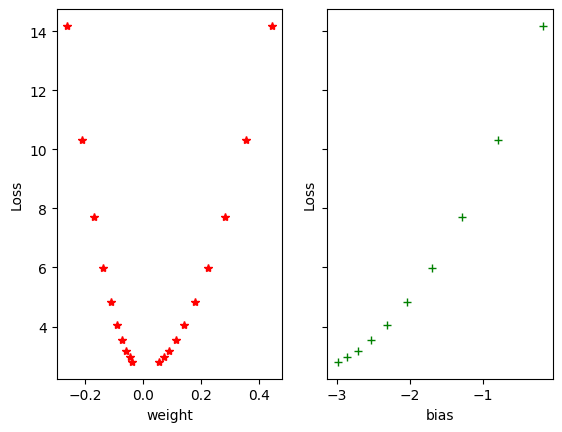

In [ ]:
# Number of epochs
num_epochs = 1000

# Learning Rate
learning_rate = 0.01

# SUBPLOT WEIGHT & BIAS VS lOSSES
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

for epoch in range(num_epochs):
    # Forward pass
    y_p = model(x)
    loss = Mean_Squared_Error(y_p, y)

    # Backproogation
    # Find the fradient using
    loss.backward()

    # Learning Rate
    learning_rate = 0.001

    # Model Parameter
    w = model.linear.weight
    b = model.linear.bias

    # Matually Update the model parameter
    w = w - learning_rate * w.grad
    b = b - learning_rate * b.grad

    # assign the weight & bias parameter to the linear layer
    model.linear.weight = nn.Parameter(w)
    model.linear.bias   = nn.Parameter(b)

    if (epoch+1) % 100 == 0:
        ax1.plot(w.detach().numpy(),loss.item(),'r*-')
        ax2.plot(b.detach().numpy(),loss.item(),'g+-')
        print('Epoch [{}/{}], weight:{}, bias:{} Loss: {:.4f}'.format(
            epoch+1,num_epochs,
            w.detach().numpy(),
            b.detach().numpy(),
            loss.item()))

ax1.set_xlabel('weight')
ax2.set_xlabel('bias')
ax1.set_ylabel('Loss')
ax2.set_ylabel('Loss')
plt.show()


In [ ]:
w = model.linear.weight
b = model.linear.bias

print('weight(W) = {} \n  bias(b) = {}'.format(
  w.abs(),
  b.abs()))


weight(W) = tensor([[0.0371, 0.0557]], grad_fn=<AbsBackward0>) 
  bias(b) = tensor([2.9878], grad_fn=<AbsBackward0>)


In [ ]:
pred =  x @ w.T + b
pred[:5]


tensor([[-2.9765],
        [-3.1385],
        [-3.0818],
        [-3.0756],
        [-2.8681]], grad_fn=<SliceBackward0>)

## Challenges with Gradient Descent

* **Local Minima**: The algorithm can get stuck in local minima instead of finding the global minimum.
* **Saddle Points**: Flat regions where the gradient is close to zero, slowing down convergence.
* **Oscillations**: In SGD, the updates can oscillate due to the noisy gradient estimates.

## 50 interview questions focused on the Gradient Descent algorithm

### Basic Concepts

1. What is Gradient Descent?

Gradient Descent is an optimization algorithm used to minimize a loss function by iteratively updating the model's parameters in the direction of the negative gradient.
___
2. What is the purpose of the learning rate in Gradient Descent?

The learning rate controls the step size of each update. It determines how quickly or slowly the algorithm converges to the minimum.
___
3. What is the gradient of a function?

The gradient is a vector of partial derivatives of a function with respect to its parameters. It points in the direction of the steepest ascent.
___
4. What is the update rule for Gradient Descent?

    θ=θ−η⋅∇J(θ)
    where,
* θ is the parameter,
* η is the learning rate, and
* ∇J(θ) is the gradient.
___
5. What are the types of Gradient Descent?

* Batch Gradient Descent,
* Stochastic Gradient Descent (SGD), and
* Mini-Batch Gradient Descent.
___
6. What is Batch Gradient Descent?

Batch GD uses the entire dataset to compute the gradient at each step.
___
7. What is Stochastic Gradient Descent (SGD)?

SGD uses one data point at a time to compute the gradient, making it faster but noisier.
___
8. What is Mini-Batch Gradient Descent?

Mini-Batch GD uses a small subset (mini-batch) of the data to compute the gradient, balancing speed and stability.
___
9. What is the difference between Gradient Descent and Stochastic Gradient Descent?

Gradient Descent uses the entire dataset for each update, while SGD uses a single data point or a mini-batch.
___
10. What is the cost function in Gradient Descent?

The cost function (or loss function) measures how well the model's predictions match the actual data. Gradient Descent minimizes this function.
___

### Challenges and Improvements

11. What is a local minimum?

A local minimum is a point where the loss function is lower than all neighboring points but not the global minimum.
___
12. What is a saddle point?

A saddle point is a point where the gradient is zero but is neither a minimum nor a maximum.
___
13. How does Gradient Descent handle saddle points?

Gradient Descent can get stuck at saddle points, but techniques like momentum or adaptive learning rates can help escape them.
___
14. What is the vanishing gradient problem?

In deep networks, gradients can become very small, slowing down learning. This is common in activation functions like sigmoid or tanh.
___
15. What is momentum in Gradient Descent?

Momentum accelerates Gradient Descent by adding a fraction of the previous update to the current update.
___
16. What is Nesterov Accelerated Gradient (NAG)?

NAG is a variant of momentum that computes the gradient at an estimated future position.
___
17. What is Adagrad?

Adagrad adapts the learning rate for each parameter based on the history of gradients.
___
18. What is RMSprop?

RMSprop improves Adagrad by using an exponentially decaying average of squared gradients.
___
19. What is Adam?

Adam combines momentum and RMSprop, adapting the learning rate for each parameter.
___
20. What is the difference between Adam and RMSprop?

Adam includes momentum, while RMSprop does not.
___

### Mathematical Insights

21. Why does Gradient Descent use the negative gradient?

The negative gradient points in the direction of the steepest descent, which minimizes the loss function.
___
22. What is the role of the Hessian matrix in optimization?

The Hessian matrix contains second-order partial derivatives and provides information about the curvature of the loss function.
___
23. What is the relationship between Gradient Descent and the Hessian matrix?

Second-order methods like Newton's method use the Hessian for faster convergence, but Gradient Descent only uses first-order derivatives.
___
24. What is the convergence criterion for Gradient Descent?

Convergence is typically achieved when the change in the loss function or parameters falls below a predefined threshold.
___
25. What is the effect of a high learning rate?

A high learning rate can cause the algorithm to overshoot the minimum or diverge.
___
26. What is the effect of a low learning rate?

A low learning rate can cause slow convergence or getting stuck in local minima.
___
27. What is the role of the bias term in Gradient Descent?

The bias term allows the model to shift the decision boundary, improving flexibility.
___
28. What is the difference between convex and non-convex functions?

Convex functions have one global minimum, while non-convex functions can have multiple local minima.
___
29. Can Gradient Descent guarantee convergence for non-convex functions?

No, Gradient Descent can get stuck in local minima for non-convex functions.
___
30. What is the difference between Gradient Descent and Newton's method?

Gradient Descent uses first-order derivatives, while Newton's method uses second-order derivatives for faster convergence.
___

### Practical Implementation

31. How do you choose the learning rate?

The learning rate is often chosen through experimentation or using techniques like learning rate schedules.
___
32. What is a learning rate schedule?

A learning rate schedule adjusts the learning rate during training (e.g., reducing it over time).
___
33. What is the role of initialization in Gradient Descent?

Proper initialization of parameters can help avoid issues like vanishing gradients or slow convergence.
___
34. What is the effect of feature scaling on Gradient Descent?

Feature scaling (e.g., normalization) ensures that all features contribute equally, improving convergence.
___
35. How do you handle overfitting in Gradient Descent?

Techniques like regularization (L1/L2) or early stopping can prevent overfitting.
___
36. What is early stopping?

Early stopping halts training when the validation error starts to increase, preventing overfitting.
___
37. What is the role of regularization in Gradient Descent?

Regularization adds a penalty term to the loss function to prevent overfitting.
___
38. What is the difference between L1 and L2 regularization?

L1 regularization adds the absolute value of weights, while L2 regularization adds the squared value.
___
39. What is the role of batch size in Mini-Batch Gradient Descent?

Batch size affects the stability and speed of convergence. Smaller batches are noisier but faster.
___
40. How do you debug Gradient Descent?

Debug by monitoring the loss function, checking gradients, and visualizing learning curves.
___

### Advanced Topics

41. What is the difference between online learning and batch learning?

Online learning updates the model with each data point, while batch learning uses the entire dataset.
___
42. What is the role of the gradient clipping technique?

Gradient clipping prevents exploding gradients by capping the gradient values.
___
43. What is the difference between Gradient Descent and Coordinate Descent?

Coordinate Descent updates one parameter at a time, while Gradient Descent updates all parameters simultaneously.
___
44. What is the role of the learning rate decay?

Learning rate decay reduces the learning rate over time to fine-tune convergence.
___
45. What is the difference between Gradient Descent and Genetic Algorithms?

Gradient Descent is a deterministic optimization method, while Genetic Algorithms are stochastic and inspired by evolution.
___
46. What is the role of the loss function in Gradient Descent?

The loss function quantifies the error, and Gradient Descent minimizes it.
___
47. What is the difference between Gradient Descent and Backpropagation?

Gradient Descent is an optimization algorithm, while Backpropagation is a method to compute gradients in neural networks.
___
48. What is the role of the chain rule in Gradient Descent?

The chain rule is used in Backpropagation to compute gradients in neural networks.
___
49. What is the difference between Gradient Descent and Proximal Gradient Descent?

Proximal Gradient Descent is used for optimizing non-smooth functions with regularization.
___
50. What is the role of the learning rate in adaptive methods like Adam?

Adaptive methods like Adam automatically adjust the learning rate for each parameter.
___

#Batch Gradient Descent

Batch Gradient Descent is a variant of the gradient descent algorithm

where the ***entire dataset*** is used to compute the gradient of the loss function with respect to the parameters.

In each iteration, the algorithm calculates the ***average gradient of the loss function*** for all the training examples and updates the model parameters accordingly.

The update rule for batch gradient descent is:

  * θ=θ−η∇J(θ)

**Key points**

  * BGD is **computationally expensive** because it updates parameters after processing the entire dataset.
  * **Memory-Intensive:** Storing and processing the entire dataset at once can be infeasible for big data applications.
  * **Converges smoothly but slowly**, making it less practical for very large datasets.
  * Works best when **data is small** to medium-sized and when stable updates are required.
  * **Alternative:** Mini-batch Gradient Descent balances speed and stability.

## When to Use Batch Gradient Descent

* When computational resources are not a concern.
* When working with small to medium-sized datasets.
* When requiring stable convergence without noisy updates.

## Implement Linear Regression using BGD with a small dataset.

Optimal Parameters: theta_0 = 4.1610, theta_1 = 2.8178


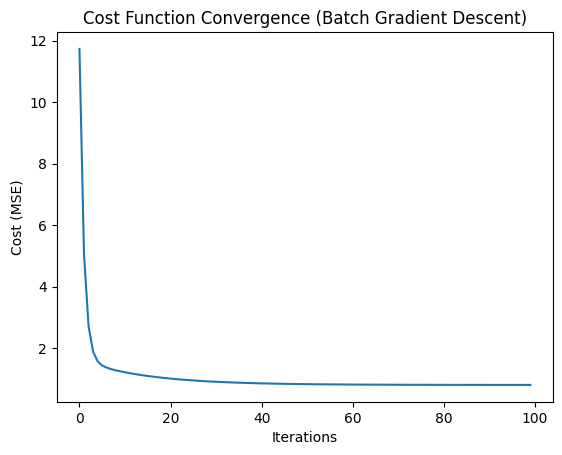

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a simple dataset
np.random.seed(42)
X = 2 * np.random.rand(100, 1)  # 100 samples, single feature
y = 4 + 3 * X + np.random.randn(100, 1)  # y = 4 + 3x + noise

# Add a bias term (column of 1s) to X for theta_0 (intercept)
X_b = np.c_[np.ones((100, 1)), X]  # Shape (100, 2)

# Batch Gradient Descent Implementation
def batch_gradient_descent(X, y, learning_rate=0.1, n_iterations=100):
    m = len(y)  # Number of training examples
    theta = np.random.randn(2, 1)  # Random initialization (2 parameters: theta_0 and theta_1)
    cost_history = []  # To track cost function value

    for iteration in range(n_iterations):
        gradients = (2/m) * X.T.dot(X.dot(theta) - y)  # Compute gradient
        theta -= learning_rate * gradients  # Update parameters
        cost = (1/m) * np.sum((X.dot(theta) - y) ** 2)  # Compute cost (MSE)
        cost_history.append(cost)

    return theta, cost_history

# Run Gradient Descent
theta_optimal, cost_history = batch_gradient_descent(X_b, y)

# Display results
print(f"Optimal Parameters: theta_0 = {theta_optimal[0][0]:.4f}, theta_1 = {theta_optimal[1][0]:.4f}")

# Plot cost function over iterations
plt.plot(cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost (MSE)")
plt.title("Cost Function Convergence (Batch Gradient Descent)")
plt.show()

# Stochastic Gradient Descent

SGD is an optimization algorithm

used to minimize the loss function by updating model parameters iteratively using **individual training samples**.

It is a variant of standard gradient descent but **updates the parameters more frequently**, leading to **faster convergence**.

**Update Rule**

SGD updates model parameters θ using the gradient of the loss function J(θ) with respect to a single training sample:
  * θ = θ − α∇J(θ;xi,yi)

## pros & cons of SGD


**Advantages of SGD**
* Faster Updates – Since updates are made per sample, SGD can quickly escape poor local minima.
* Efficient for Large Datasets – Unlike BGD, it doesn't require the entire dataset to fit in memory.
* Regularization Effect – The noise in updates can help generalization and prevent overfitting.

**Disadvantages of SGD**
* Noisy Convergence – Frequent updates introduce variance, making the path to the minimum unstable.
* Hyperparameter Sensitivity – Requires careful tuning of the learning rate.
* May Not Find Global Optimum – Can get stuck in suboptimal minima.

## Implement Linear Regression using SGD

Optimal Parameters (SGD): theta_0 = 4.7183, theta_1 = 3.0554


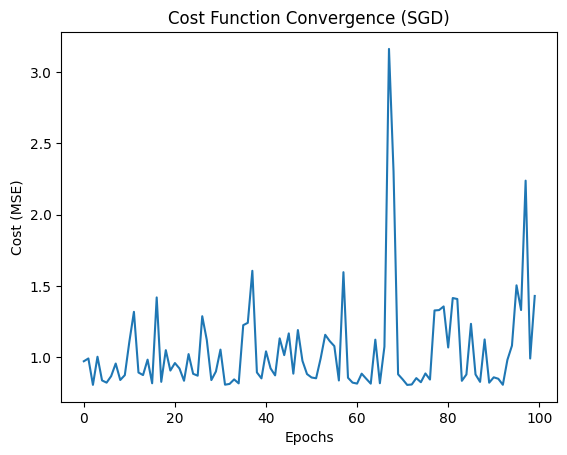

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a simple dataset
np.random.seed(42)
X = 2 * np.random.rand(100, 1)  # 100 samples, single feature
y = 4 + 3 * X + np.random.randn(100, 1)  # y = 4 + 3x + noise

# Add bias term (column of ones for intercept)
X_b = np.c_[np.ones((100, 1)), X]  # Shape (100, 2)

# Stochastic Gradient Descent Implementation
def stochastic_gradient_descent(X, y, learning_rate=0.1, n_epochs=100):
    m = len(y)  # Number of training examples
    theta = np.random.randn(2, 1)  # Random initialization (2 parameters: theta_0 and theta_1)
    cost_history = []  # Track cost function values

    for epoch in range(n_epochs):
        for i in range(m):
            random_index = np.random.randint(m)  # Select a random index
            xi = X[random_index:random_index+1]  # Select one training sample
            yi = y[random_index:random_index+1]  # Corresponding label

            gradients = 2 * xi.T.dot(xi.dot(theta) - yi)  # Compute gradient
            theta -= learning_rate * gradients  # Update parameters

        # Compute and store cost (for tracking convergence)
        cost = (1/m) * np.sum((X.dot(theta) - y) ** 2)  # Compute cost (MSE)
        cost_history.append(cost)

    return theta, cost_history

# Run SGD
theta_sgd, cost_history_sgd = stochastic_gradient_descent(X_b, y)

# Display results
print(f"Optimal Parameters (SGD): theta_0 = {theta_sgd[0][0]:.4f}, theta_1 = {theta_sgd[1][0]:.4f}")

# Plot cost function over epochs
plt.plot(cost_history_sgd)
plt.xlabel("Epochs")
plt.ylabel("Cost (MSE)")
plt.title("Cost Function Convergence (SGD)")
plt.show()

# Mini-batch Gradient Descent

Mini-Batch Gradient Descent is a compromise between Batch Gradient Descent (BGD) and Stochastic Gradient Descent (SGD).

Instead of updating parameters after processing the entire dataset (BGD) or after every single training example (SGD), MBGD updates parameters after computing the gradient on a small batch of data.

Update Rule
* θ = θ − α ∇J(θ;X_batch)

## Key Advantages

* Balances Efficiency and Stability:

  * Unlike SGD, which updates too frequently and is noisy, MBGD provides smoother convergence.

  * Unlike BGD, which is slow, MBGD makes faster updates.

* Vectorized Computation:

  * Enables efficient matrix operations using hardware acceleration (GPUs).

* Generalization Ability:

  * The randomness in mini-batches helps escape local minima better than BGD.

## Choosing the Mini-Batch Size

Typical Range: 32–256 (depends on dataset and model).

* Small batch sizes (e.g., 8, 16, 32, 64): More stochasticity, better generalization but noisier updates.
* Large batch sizes (e.g., 512, 1024): More stable updates but may converge to sharp minima (which can lead to worse generalization).

## Implement Linear Regression using MBGD

Optimal Parameters (Mini-Batch GD): theta_0 = 4.1316, theta_1 = 2.8066


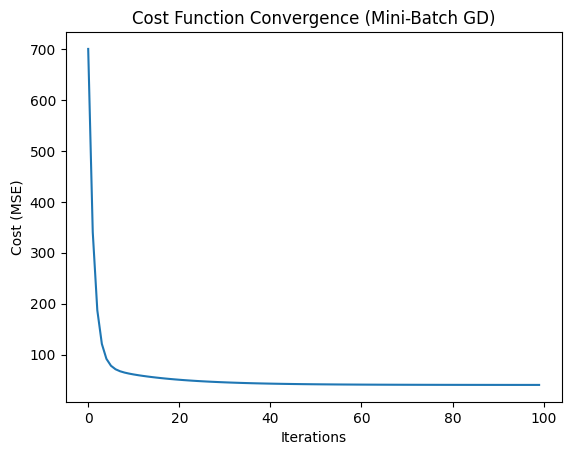

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a simple dataset
np.random.seed(42)
X = 2 * np.random.rand(100, 1)  # 100 samples, single feature
y = 4 + 3 * X + np.random.randn(100, 1)  # y = 4 + 3x + noise

# Add bias term (column of ones for intercept)
X_b = np.c_[np.ones((100, 1)), X]  # Shape (100, 2)

# Function to compute hypothesis / predictions
def hypothesis(X, theta):
    return np.dot(X, theta)

# Function to compute gradient of error function w.r.t. theta
def gradient(X, y, theta):
    return (2/m) * X.T.dot(X.dot(theta) - y)

# Function to compute the error (cost) for current values of theta
def cost(X, y, theta):
    h = hypothesis(X, theta)
    J = np.dot((h - y).transpose(), (h - y))
    J /= 2
    return J[0]

# Function to create mini-batches
def create_mini_batches(X, y, batch_size):
    mini_batches = []
    data = np.hstack((X, y))
    np.random.shuffle(data)
    n_minibatches = data.shape[0] // batch_size
    for i in range(n_minibatches + 1):
        mini_batch = data[i * batch_size:(i + 1)*batch_size, :]
        X_mini = mini_batch[:, :-1]
        Y_mini = mini_batch[:, -1].reshape((-1, 1))
        mini_batches.append((X_mini, Y_mini))
    if data.shape[0] % batch_size != 0:
        mini_batch = data[i * batch_size:data.shape[0]]
        X_mini = mini_batch[:, :-1]
        Y_mini = mini_batch[:, -1].reshape((-1, 1))
        mini_batches.append((X_mini, Y_mini))
    return mini_batches

# Function to perform mini-batch gradient descent
def gradientDescent(X, y, learning_rate=0.001, batch_size=32, max_iters=100):
    theta = np.random.randn(2, 1)  # Initialize theta
    error_list = []  # List to track cost function
    mini_batches = create_mini_batches(X, y, batch_size)
    for itr in range(max_iters):
        for mini_batch in mini_batches:
            X_mini, y_mini = mini_batch
            theta = theta - learning_rate * gradient(X_mini, y_mini, theta)  # Update theta
        error_list.append(cost(X, y, theta))  # Track the error
    return theta, error_list

# Run Mini-Batch Gradient Descent
theta_mbgd, error_list_mbgd = gradientDescent(X_b, y, learning_rate=0.1, batch_size=8)

# Display results
print(f"Optimal Parameters (Mini-Batch GD): theta_0 = {theta_mbgd[0][0]:.4f}, theta_1 = {theta_mbgd[1][0]:.4f}")

# Plot cost function over iterations
plt.plot(error_list_mbgd)
plt.xlabel("Iterations")
plt.ylabel("Cost (MSE)")
plt.title("Cost Function Convergence (Mini-Batch GD)")
plt.show()

## Practical Implementation (Python + TensorFlow - MNIST Example)

In [ ]:
import tensorflow as tf

# Load dataset
(x_train, y_train), _ = tf.keras.datasets.mnist.load_data()
x_train = x_train.astype("float32") / 255.0  # Normalize

# Create a simple neural network
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile model with mini-batch training
model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),  # Mini-batch updates
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train using mini-batches (batch_size=64)
model.fit(x_train, y_train, batch_size=64, epochs=10)

# Momentum


    Momentum: Uses past gradients to smooth updates.

Inspired by the physics of momentum, where a moving object (like a ball) keeps moving in the same direction unless acted upon by an external force.

Momentum is an optimization technique used to accelerate gradient-based learning algorithms, particularly Stochastic Gradient Descent (SGD).

* It helps in faster convergence and reduces oscillations by adding a fraction of the previous update to the current update.
* This is especially useful when dealing with high-curvature or noisy gradients.

## How Momentum Works

Momentum introduces a "velocity" term that accumulates past gradients to smooth the update direction.

This helps the optimizer to:

* Move faster along directions with consistent gradients.
* Reduce oscillations in directions with inconsistent gradients.

Momentum adds a fraction (momentum term) of the previous update to the current update. This is akin to keeping track of the moving average of the gradients.
___

Update Rule (Standard Momentum):

    v_t = β(v_t1) + (1−β)∇J(θ)

* v_t is the velocity (or accumulated gradient) at time step t.
* v_t1 is the velocity (or accumulated gradient) at time step t-1.
* β is the momentum factor (typically set between 0.5 and 0.9).
* ∇J(θ) is the gradient of the loss function with respect to the parameters θ.
* α is the learning rate.

Parameter Update:

    θ = θ − αv_t

## Choosing the Momentum Parameter (β)

The momentum term β controls how much influence the previous gradients should have on the current update:

Typical values:

* β is usually set between 0.5 and 0.9.
* higher β (e.g., 0.9) will give more weight to previous gradients, which can help in **smoother convergence** but may slow down in areas where the gradients change direction frequently.

* lower β (e.g., 0.5) will allow the optimizer to respond more quickly to changes in the gradient, but **may lead to noisier updates**.

## When to Use Momentum
* For noisy gradients (e.g., stochastic gradient descent), momentum can help smooth out fluctuations and ensure steady progress toward the optimal solution.

* For training deep networks, where gradients can become very small or unstable, momentum helps prevent the optimization from stalling and speeds up convergence.
* In scenarios with sharp or irregular loss surfaces, like those found in deep learning, momentum accelerates the optimizer's ability to traverse these surfaces more quickly.

## SGD with Momentum vs SGD without Momentum:

Optimal Parameters (SGD): theta_0 = 4.7183, theta_1 = 3.0554
Optimal Parameters (SGD with Momentum): theta_0 = 4.0082, theta_1 = 2.7037


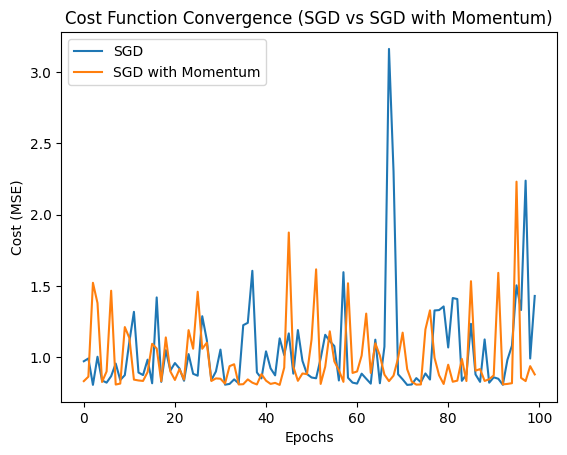

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a simple dataset
np.random.seed(42)
X = 2 * np.random.rand(100, 1)  # 100 samples, single feature
y = 4 + 3 * X + np.random.randn(100, 1)  # y = 4 + 3x + noise

# Add bias term (column of ones for intercept)
X_b = np.c_[np.ones((100, 1)), X]  # Shape (100, 2)

# Stochastic Gradient Descent without Momentum (original)
def stochastic_gradient_descent(X, y, learning_rate=0.1, n_epochs=100):
    m = len(y)  # Number of training examples
    theta = np.random.randn(2, 1)  # Random initialization (2 parameters: theta_0 and theta_1)
    cost_history = []  # Track cost function values

    for epoch in range(n_epochs):
        for i in range(m):
            random_index = np.random.randint(m)  # Select a random index
            xi = X[random_index:random_index+1]  # Select one training sample
            yi = y[random_index:random_index+1]  # Corresponding label

            gradients = 2 * xi.T.dot(xi.dot(theta) - yi)  # Compute gradient
            theta -= learning_rate * gradients  # Update parameters

        # Compute and store cost (for tracking convergence)
        cost = (1/m) * np.sum((X.dot(theta) - y) ** 2)  # Compute cost (MSE)
        cost_history.append(cost)

    return theta, cost_history

# Stochastic Gradient Descent with Momentum
def stochastic_gradient_descent_momentum(X, y, learning_rate=0.1, n_epochs=100, beta=0.9):
    m = len(y)  # Number of training examples
    theta = np.random.randn(2, 1)  # Random initialization (2 parameters: theta_0 and theta_1)
    cost_history = []  # Track cost function values
    velocity = np.zeros_like(theta)  # Initialize velocity (momentum)

    for epoch in range(n_epochs):
        for i in range(m):
            random_index = np.random.randint(m)  # Select a random index
            xi = X[random_index:random_index+1]  # Select one training sample
            yi = y[random_index:random_index+1]  # Corresponding label

            gradients = 2 * xi.T.dot(xi.dot(theta) - yi)  # Compute gradient
            velocity = beta * velocity + (1 - beta) * gradients  # Update velocity with momentum
            theta -= learning_rate * velocity  # Update parameters with momentum

        # Compute and store cost (for tracking convergence)
        cost = (1/m) * np.sum((X.dot(theta) - y) ** 2)  # Compute cost (MSE)
        cost_history.append(cost)

    return theta, cost_history

# Run both SGD and SGD with Momentum
theta_sgd, cost_history_sgd = stochastic_gradient_descent(X_b, y)
theta_sgd_momentum, cost_history_sgd_momentum = stochastic_gradient_descent_momentum(X_b, y)

# Display results
print(f"Optimal Parameters (SGD): theta_0 = {theta_sgd[0][0]:.4f}, theta_1 = {theta_sgd[1][0]:.4f}")
print(f"Optimal Parameters (SGD with Momentum): theta_0 = {theta_sgd_momentum[0][0]:.4f}, theta_1 = {theta_sgd_momentum[1][0]:.4f}")

# Plot cost function over epochs for both
plt.plot(cost_history_sgd, label="SGD")
plt.plot(cost_history_sgd_momentum, label="SGD with Momentum")
plt.xlabel("Epochs")
plt.ylabel("Cost (MSE)")
plt.title("Cost Function Convergence (SGD vs SGD with Momentum)")
plt.legend()
plt.show()


In [ ]:
# Calculate Convergence Speed (Average decrease in cost per epoch)
def calculate_convergence_speed(cost_history):
    cost_diff = np.diff(cost_history)  # Difference between consecutive cost values
    avg_speed = np.mean(np.abs(cost_diff))  # Average absolute change in cost per epoch
    return avg_speed

# Calculate Oscillations (Standard deviation of cost over epochs)
def calculate_oscillations(cost_history):
    return np.std(cost_history)  # Standard deviation of cost function values

# Convergence Speed for both methods
convergence_speed_sgd = calculate_convergence_speed(cost_history_sgd)
convergence_speed_sgd_momentum = calculate_convergence_speed(cost_history_sgd_momentum)

# Oscillations for both methods
oscillations_sgd = calculate_oscillations(cost_history_sgd)
oscillations_sgd_momentum = calculate_oscillations(cost_history_sgd_momentum)

# Display results
print(f"Convergence Speed (SGD): {convergence_speed_sgd:.6f}")
print(f"Convergence Speed (SGD with Momentum): {convergence_speed_sgd_momentum:.6f}")
print(f"Oscillations (SGD): {oscillations_sgd:.6f}")
print(f"Oscillations (SGD with Momentum): {oscillations_sgd_momentum:.6f}")

Convergence Speed (SGD): 0.235483
Convergence Speed (SGD with Momentum): 0.223976
Oscillations (SGD): 0.340576
Oscillations (SGD with Momentum): 0.252278


# Nesterov Accelerated Gradient (NAG)

    Nesterov Accelerated Gradient (NAG): Similar to momentum but 'anticipates' the next position before computing the gradient.

(NAG) is an optimization algorithm that improves upon standard Momentum by incorporating a "look-ahead" mechanism.

It is particularly effective in reducing oscillations and speeding up convergence, especially in scenarios where the loss surface has high curvature.

* It has also been shown to improve performance when training RNNs, which are known for having vanishing/exploding gradients.

## How NAG Works

* **Momentum Term:** NAG uses a momentum term (β) to accumulate past gradients, similar to standard Momentum.
* **Look-Ahead Step:** Instead of computing the gradient at the current parameters (θ), NAG computes the gradient at an estimated future position
(θ-βv_t−1), where v_t−1 is the accumulated velocity from the previous step.
* **Update Rule:** The parameters are updated using the gradient computed at the look-ahead position.


___
Compute the anticipated parameters:

    θ~t = θ(t) − β⋅v_t−1

Compute the gradient at the anticipated parameters:
    
    gt = ∇J(θ~t)

Update the momentum term:

    v_t = β⋅v_t−1 + (1−β)⋅gt

Update the parameters:

    θ(t+1) = θ(t) − α⋅v_t
___

The update rules for NAG are:

Velocity Update:

    v_t = β.v_t−1 + (1-β) ∇J(θ − β.v_t−1)

Here,
* ∇J(θ − β.v_t−1) is the gradient computed at the look-ahead position.

Parameter Update:
    
    θ = θ − α.v_t
 ___

## Cons of NAG
* More Computationally Expensive: Because NAG requires computing the gradient at the anticipated position, it adds a bit more computational overhead compared to regular momentum.

* Requires Tuning of Hyperparameters: Like momentum, NAG’s performance depends on the choice of hyperparameters, such as the momentum coefficient β and the learning rate α.

## NAG vs Momentum with SGD

Optimal Parameters (SGD): theta_0 = 4.7183, theta_1 = 3.0554
Optimal Parameters (SGD with Momentum): theta_0 = 4.0082, theta_1 = 2.7037
Optimal Parameters (SGD with NAG): theta_0 = 4.1640, theta_1 = 3.0344


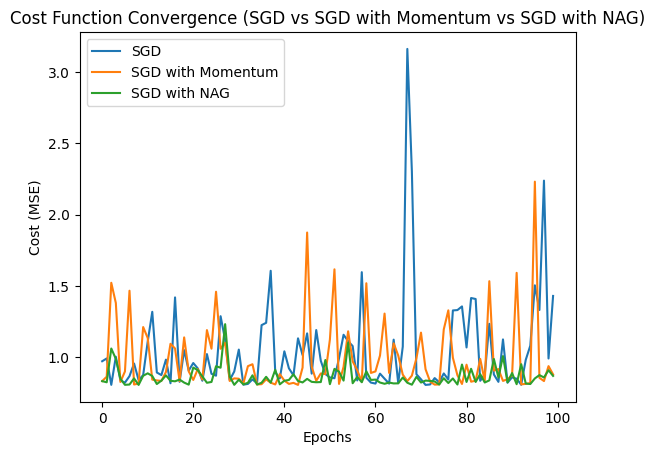

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a simple dataset
np.random.seed(42)
X = 2 * np.random.rand(100, 1)  # 100 samples, single feature
y = 4 + 3 * X + np.random.randn(100, 1)  # y = 4 + 3x + noise

# Add bias term (column of ones for intercept)
X_b = np.c_[np.ones((100, 1)), X]  # Shape (100, 2)


# Stochastic Gradient Descent with Momentum
def stochastic_gradient_descent_momentum(X, y, learning_rate=0.1, n_epochs=100, beta=0.9):
    m = len(y)  # Number of training examples
    theta = np.random.randn(2, 1)  # Random initialization (2 parameters: theta_0 and theta_1)
    cost_history = []  # Track cost function values
    velocity = np.zeros_like(theta)  # Initialize velocity (momentum)

    for epoch in range(n_epochs):
        for i in range(m):
            random_index = np.random.randint(m)  # Select a random index
            xi = X[random_index:random_index+1]  # Select one training sample
            yi = y[random_index:random_index+1]  # Corresponding label

            gradients = 2 * xi.T.dot(xi.dot(theta) - yi)  # Compute gradient
            velocity = beta * velocity + (1 - beta) * gradients  # Update velocity with momentum
            theta -= learning_rate * velocity  # Update parameters with momentum

        # Compute and store cost (for tracking convergence)
        cost = (1/m) * np.sum((X.dot(theta) - y) ** 2)  # Compute cost (MSE)
        cost_history.append(cost)

    return theta, cost_history

# Stochastic Gradient Descent with Nesterov Accelerated Gradient (NAG)
def stochastic_gradient_descent_nag(X, y, learning_rate=0.1, n_epochs=100, beta=0.9):
    m = len(y)  # Number of training examples
    theta = np.random.randn(2, 1)  # Random initialization (2 parameters: theta_0 and theta_1)
    cost_history = []  # Track cost function values
    velocity = np.zeros_like(theta)  # Initialize velocity (momentum)

    for epoch in range(n_epochs):
        for i in range(m):
            random_index = np.random.randint(m)  # Select a random index
            xi = X[random_index:random_index+1]  # Select one training sample
            yi = y[random_index:random_index+1]  # Corresponding label

            # "Lookahead" step before computing the gradient
            lookahead_theta = theta - beta * velocity

            # Compute the gradient at the lookahead position
            gradients = 2 * xi.T.dot(xi.dot(lookahead_theta) - yi)  # Compute gradient at the lookahead position
            velocity = beta * velocity + (1 - beta) * gradients  # Update velocity with momentum
            theta -= learning_rate * velocity  # Update parameters with momentum

        # Compute and store cost (for tracking convergence)
        cost = (1/m) * np.sum((X.dot(theta) - y) ** 2)  # Compute cost (MSE)
        cost_history.append(cost)

    return theta, cost_history

# Run both SGD with Momentum, SGD with NAG
theta_sgd, cost_history_sgd = stochastic_gradient_descent(X_b, y)
theta_sgd_momentum, cost_history_sgd_momentum = stochastic_gradient_descent_momentum(X_b, y)
theta_sgd_nag, cost_history_sgd_nag = stochastic_gradient_descent_nag(X_b, y)

# Display results
print(f"Optimal Parameters (SGD): theta_0 = {theta_sgd[0][0]:.4f}, theta_1 = {theta_sgd[1][0]:.4f}")
print(f"Optimal Parameters (SGD with Momentum): theta_0 = {theta_sgd_momentum[0][0]:.4f}, theta_1 = {theta_sgd_momentum[1][0]:.4f}")
print(f"Optimal Parameters (SGD with NAG): theta_0 = {theta_sgd_nag[0][0]:.4f}, theta_1 = {theta_sgd_nag[1][0]:.4f}")


# Plot cost function over epochs for both
plt.plot(cost_history_sgd, label="SGD")
plt.plot(cost_history_sgd_momentum, label="SGD with Momentum")
plt.plot(cost_history_sgd_nag, label="SGD with NAG")
plt.xlabel("Epochs")
plt.ylabel("Cost (MSE)")
plt.title("Cost Function Convergence (SGD vs SGD with Momentum vs SGD with NAG)")
plt.legend()
plt.show()


# Adaptive Gradient Algorithm (Adagrad)

___
**Adaptive Gradient Methods in Machine Learning**

Adaptive gradient methods are a class of optimization algorithms designed to **adjust the learning rate during training**.

These methods are particularly useful in handling sparse data or data with different feature scales. They change the learning rate for each parameter, allowing for more efficient training.
___

Adagrad adapts the learning rate to the parameters, performing smaller updates for frequently occurring features and larger updates for infrequent ones.

* Adagrad is best for sparse data, like text or one-hot encoded categorical variables.
___
In traditional gradient descent, a single learning rate is applied to all parameters, which may not be ideal for all features in the data.

Adagrad solves this by scaling the learning rate for each parameter inversely proportional to the square root of the sum of all the squared gradients for that parameter.

## How Adagrad Works

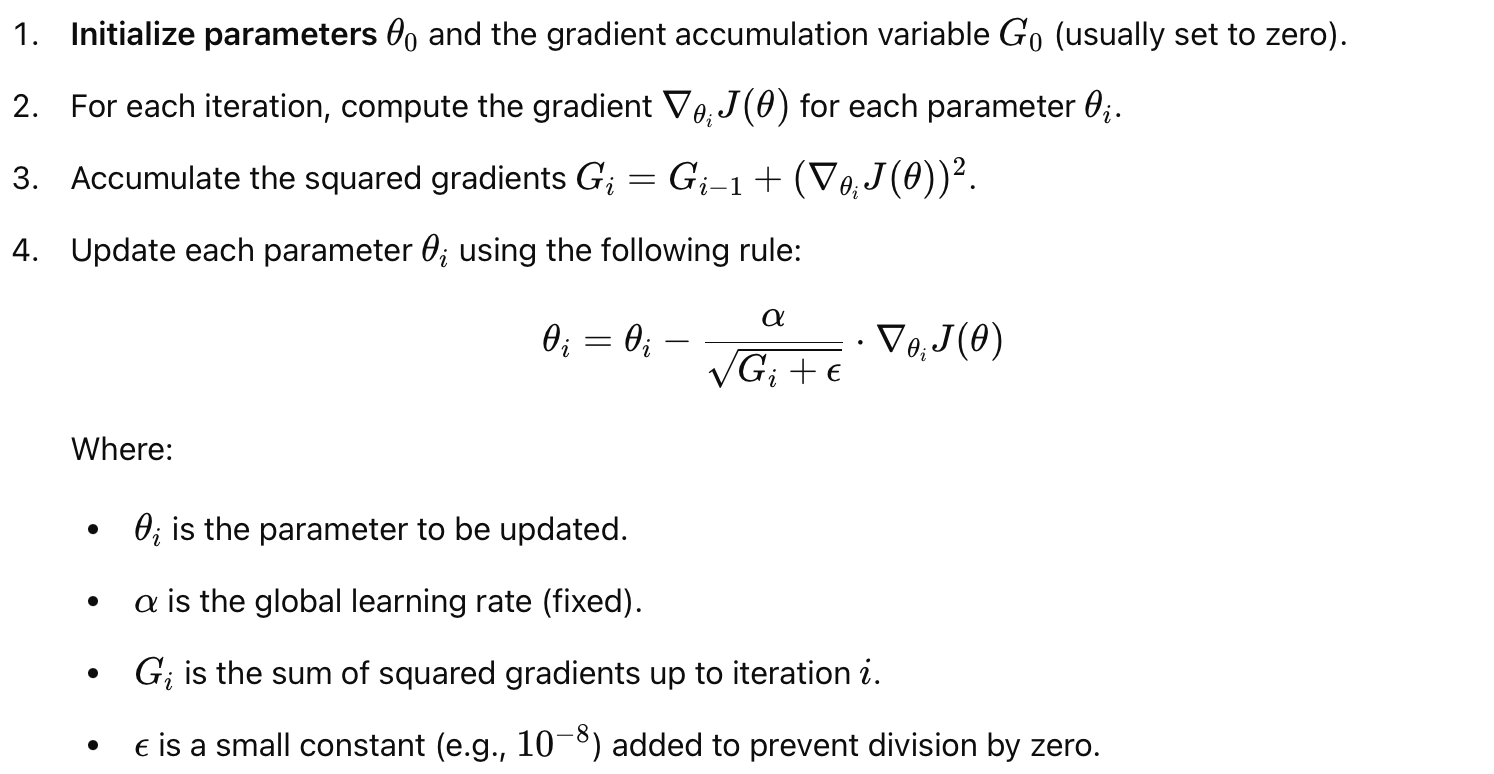

## Advantages of Adagrad
* **Automatic Learning Rate Adjustment:** Adagrad adjusts the learning rate for each parameter based on its gradient history. It allows for faster convergence for parameters that have less change and slower convergence for parameters that have large changes.

* **No Need for Learning Rate Tuning:** In some cases, Adagrad works well without needing to manually adjust the learning rate over time.

* **Effective for Sparse Data:** Adagrad is especially useful for applications like natural language processing (NLP) and recommender systems, where some features are infrequent (e.g., rare words or user interactions).

* Adagrad is best for sparse data, like text or one-hot encoded categorical variables.

## Disadvantages of Adagrad
* **Rapid Learning Rate Decay:** The accumulation of squared gradients causes the learning rate to decrease over time. This can cause the algorithm to converge prematurely, as the learning rate becomes too small after a number of updates.

* **Inefficient for Non-Sparse Data:** Adagrad can struggle with dense data where gradients do not vary much across features.

* **Poor Long-Term Performance:** In some problems, where more epochs are needed, the learning rate may decay too much, making it hard for the optimizer to explore the entire parameter space.

## Adagrad Implementation for Linear Regression

Optimal Parameters using Adagrad: theta_0 = 1.6001, theta_1 = 3.0042


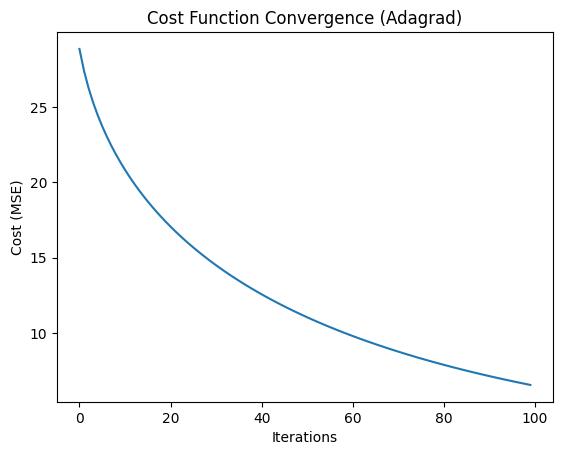

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a simple dataset
np.random.seed(42)
X = 2 * np.random.rand(100, 1)  # 100 samples, single feature
y = 4 + 3 * X + np.random.randn(100, 1)  # y = 4 + 3x + noise

# Add a bias term (column of 1s) to X for theta_0 (intercept)
X_b = np.c_[np.ones((100, 1)), X]  # Shape (100, 2)

# Adagrad Implementation
def adagrad(X, y, learning_rate=0.1, n_iterations=100, epsilon=1e-8):
    m = len(y)  # Number of training examples
    theta = np.random.randn(2, 1)  # Random initialization (2 parameters: theta_0 and theta_1)
    cost_history = []  # To track cost function value
    gradient_squared_sum = np.zeros_like(theta)  # Sum of squared gradients

    for iteration in range(n_iterations):
        gradients = (2/m) * X.T.dot(X.dot(theta) - y)  # Compute gradient
        gradient_squared_sum += gradients ** 2  # Accumulate squared gradients
        theta -= (learning_rate / (np.sqrt(gradient_squared_sum) + epsilon)) * gradients  # Update parameters

        cost = (1/m) * np.sum((X.dot(theta) - y) ** 2)  # Compute cost (MSE)
        cost_history.append(cost)

    return theta, cost_history

# Run Adagrad
theta_optimal_adagrad, cost_history_adagrad = adagrad(X_b, y)

# Display results
print(f"Optimal Parameters using Adagrad: theta_0 = {theta_optimal_adagrad[0][0]:.4f}, theta_1 = {theta_optimal_adagrad[1][0]:.4f}")

# Plot cost function over iterations
plt.plot(cost_history_adagrad)
plt.xlabel("Iterations")
plt.ylabel("Cost (MSE)")
plt.title("Cost Function Convergence (Adagrad)")
plt.show()


* Adagrad is best for sparse data, like text or one-hot encoded categorical variables.

Optimal Parameters using Adagrad: theta_0 = 2.8031, theta_1 = 3.9837


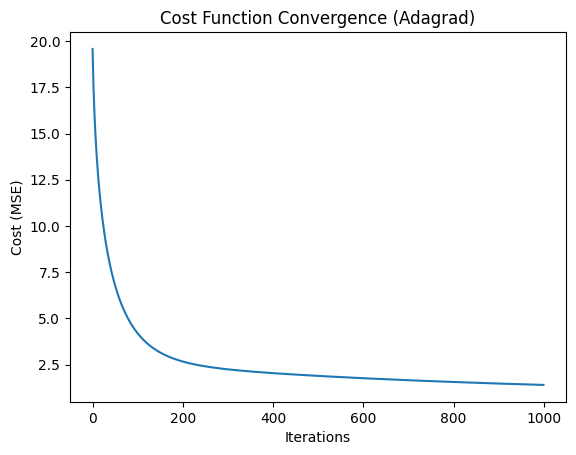

In [ ]:
# Run Adagrad
theta_optimal_adagrad, cost_history_adagrad = adagrad(X_b, y, n_iterations=1000)

# Display results
print(f"Optimal Parameters using Adagrad: theta_0 = {theta_optimal_adagrad[0][0]:.4f}, theta_1 = {theta_optimal_adagrad[1][0]:.4f}")

# Plot cost function over iterations
plt.plot(cost_history_adagrad)
plt.xlabel("Iterations")
plt.ylabel("Cost (MSE)")
plt.title("Cost Function Convergence (Adagrad)")
plt.show()

# Root Mean Square Propagation (RMSprop)

RMSprop (Root Mean Square Propagation) is an adaptive learning rate optimization algorithm designed to address the limitations of Adagrad.

## Key Features of RMSprop


* **Adaptive Learning Rate:** RMSprop adjusts the learning rate for each parameter based on its historical gradient magnitude, which makes it more effective for non-stationary objectives (i.e., data that changes over time).

* **Moving Average of Squared Gradients:** Instead of accumulating all squared gradients like Adagrad, RMSprop uses a moving average to compute the denominator for adjusting the learning rate. This helps in avoiding the rapid decay of the learning rate, which can occur with Adagrad.

This makes it more efficient in problems like online learning and recurrent neural networks (RNNs), where the objective function is non-convex or changes dynamically over time.

## How RMSprop Works

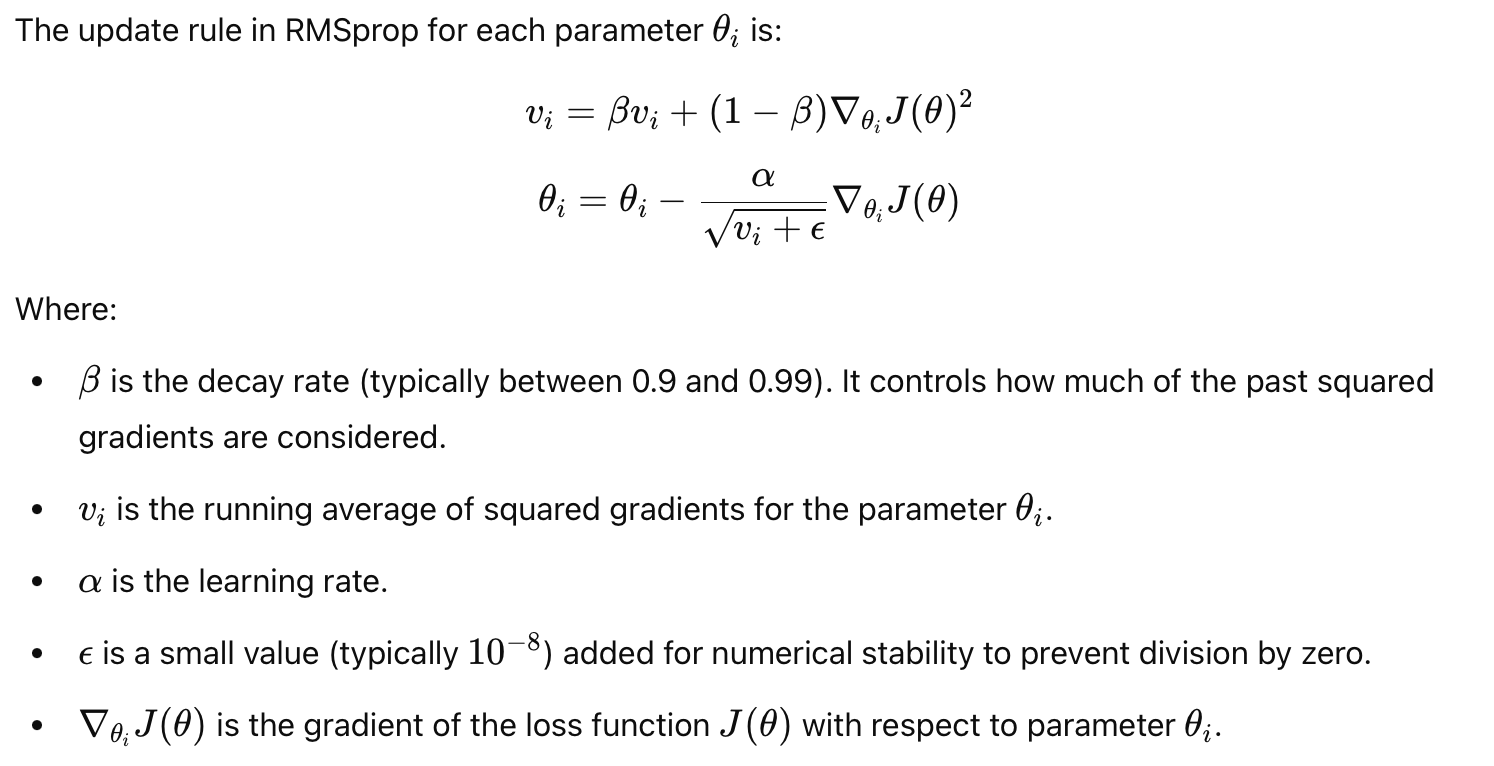

## Advantages of RMSprop:
* Handles Sparse Gradients: Like Adagrad, RMSprop adjusts the learning rate per parameter, but unlike Adagrad, the learning rate doesn’t shrink indefinitely. This helps the algorithm perform well on tasks with sparse gradients.

* Faster Convergence: RMSprop works well for online and non-stationary problems and helps speed up convergence compared to standard stochastic gradient descent (SGD).

* Good for Non-Convex Problems: RMSprop is effective in training models for complex problems such as RNNs, which have non-convex optimization landscapes.

## RMSprop vs Adagrad

Optimal Parameters using Adagrad: theta_0 = 1.6001, theta_1 = 3.0042
Optimal Parameters using RMSprop: theta_0 = 4.2151, theta_1 = 2.7701


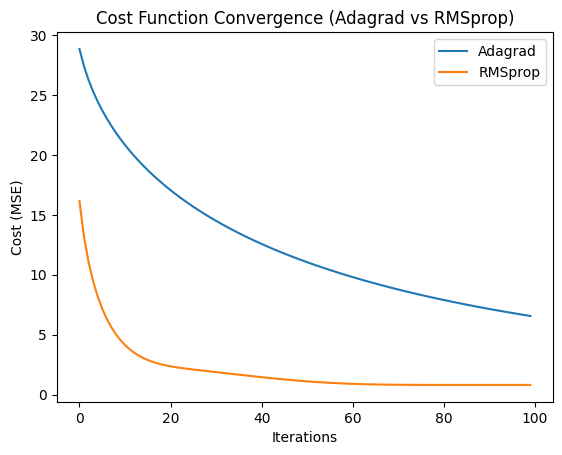

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a simple dataset
np.random.seed(42)
X = 2 * np.random.rand(100, 1)  # 100 samples, single feature
y = 4 + 3 * X + np.random.randn(100, 1)  # y = 4 + 3x + noise

# Add a bias term (column of 1s) to X for theta_0 (intercept)
X_b = np.c_[np.ones((100, 1)), X]  # Shape (100, 2)

# Adagrad Implementation
def adagrad(X, y, learning_rate=0.1, n_iterations=100, epsilon=1e-8):
    m = len(y)  # Number of training examples
    theta = np.random.randn(2, 1)  # Random initialization (2 parameters: theta_0 and theta_1)
    cost_history = []  # To track cost function value
    gradient_squared_sum = np.zeros_like(theta)  # Sum of squared gradients

    for iteration in range(n_iterations):
        gradients = (2/m) * X.T.dot(X.dot(theta) - y)  # Compute gradient
        gradient_squared_sum += gradients ** 2  # Accumulate squared gradients
        theta -= (learning_rate / (np.sqrt(gradient_squared_sum) + epsilon)) * gradients  # Update parameters

        cost = (1/m) * np.sum((X.dot(theta) - y) ** 2)  # Compute cost (MSE)
        cost_history.append(cost)

    return theta, cost_history

# RMSprop Implementation
def rmsprop(X, y, learning_rate=0.1, n_iterations=100, epsilon=1e-8, beta=0.9):
    m = len(y)  # Number of training examples
    theta = np.random.randn(2, 1)  # Random initialization (2 parameters: theta_0 and theta_1)
    cost_history = []  # To track cost function value
    gradient_squared_avg = np.zeros_like(theta)  # Moving average of squared gradients

    for iteration in range(n_iterations):
        gradients = (2/m) * X.T.dot(X.dot(theta) - y)  # Compute gradient
        gradient_squared_avg = beta * gradient_squared_avg + (1 - beta) * gradients ** 2  # Moving average
        theta -= (learning_rate / (np.sqrt(gradient_squared_avg) + epsilon)) * gradients  # Update parameters

        cost = (1/m) * np.sum((X.dot(theta) - y) ** 2)  # Compute cost (MSE)
        cost_history.append(cost)

    return theta, cost_history

# Run RMSprop
theta_optimal_adagrad, cost_history_adagrad = adagrad(X_b, y, n_iterations=100)
theta_optimal_rmsprop, cost_history_rmsprop = rmsprop(X_b, y, n_iterations=100)

# Display results
print(f"Optimal Parameters using Adagrad: theta_0 = {theta_optimal_adagrad[0][0]:.4f}, theta_1 = {theta_optimal_adagrad[1][0]:.4f}")
print(f"Optimal Parameters using RMSprop: theta_0 = {theta_optimal_rmsprop[0][0]:.4f}, theta_1 = {theta_optimal_rmsprop[1][0]:.4f}")

# Plot cost function over iterations for both Adagrad and RMSprop
plt.plot(cost_history_adagrad, label="Adagrad")
plt.plot(cost_history_rmsprop, label="RMSprop")
plt.xlabel("Iterations")
plt.ylabel("Cost (MSE)")
plt.title("Cost Function Convergence (Adagrad vs RMSprop)")
plt.legend()
plt.show()


# Adaptive Moment Estimation (Adam)

It combines the strengths of two other adaptive optimization algorithms:

* Momentum (which helps accelerate gradient descent)

* RMSprop (which adapts learning rates individually for each parameter)

This combination makes Adam both fast and efficient in handling noisy gradients, sparse data, and non-stationary objectives.

## How Adam Works

Adam maintains two moving averages for each parameter:

* First Moment Estimate - mean (m_t): The exponentially weighted average of past gradients (similar to momentum).
* Second Moment Estimate - variance (v_t): The exponentially weighted average of squared gradients (similar to RMSprop).

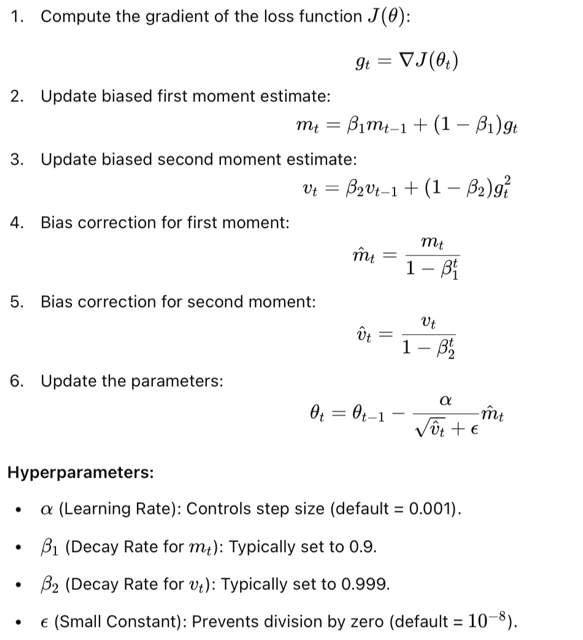

## Adam vs RMSprop

Optimal Parameters using RMSprop: theta_0 = 4.2149, theta_1 = 2.7703
Optimal Parameters using Adam: theta_0 = 4.3485, theta_1 = 2.6577
Optimal Parameters using Momentum: theta_0 = 4.2191, theta_1 = 2.7762


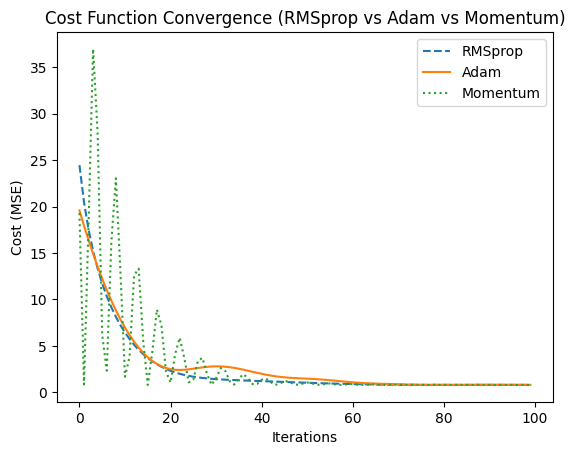

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a simple dataset
np.random.seed(42)
X = 2 * np.random.rand(100, 1)  # 100 samples, single feature
y = 4 + 3 * X + np.random.randn(100, 1)  # y = 4 + 3x + noise

# Add a bias term (column of 1s) to X for theta_0 (intercept)
X_b = np.c_[np.ones((100, 1)), X]  # Shape (100, 2)

# RMSprop Implementation
def rmsprop(X, y, learning_rate=0.1, n_iterations=100, epsilon=1e-8, beta=0.9):
    m = len(y)
    theta = np.random.randn(2, 1)
    cost_history = []
    gradient_squared_avg = np.zeros_like(theta)

    for iteration in range(n_iterations):
        gradients = (2/m) * X.T.dot(X.dot(theta) - y)
        gradient_squared_avg = beta * gradient_squared_avg + (1 - beta) * gradients ** 2
        theta -= (learning_rate / (np.sqrt(gradient_squared_avg) + epsilon)) * gradients

        cost = (1/m) * np.sum((X.dot(theta) - y) ** 2)
        cost_history.append(cost)

    return theta, cost_history

# Adam Implementation
def adam(X, y, learning_rate=0.1, n_iterations=100, epsilon=1e-8, beta1=0.9, beta2=0.9):
    m = len(y)
    theta = np.random.randn(2, 1)
    cost_history = []
    m_t = np.zeros_like(theta)  # First moment estimate
    v_t = np.zeros_like(theta)  # Second moment estimate

    for iteration in range(1, n_iterations + 1):
        gradients = (2/m) * X.T.dot(X.dot(theta) - y)

        # Update biased first moment estimate
        m_t = beta1 * m_t + (1 - beta1) * gradients

        # Update biased second moment estimate
        v_t = beta2 * v_t + (1 - beta2) * (gradients ** 2)

        # Bias correction
        m_t_hat = m_t / (1 - beta1 ** iteration)
        v_t_hat = v_t / (1 - beta2 ** iteration)

        # Update parameters
        theta -= (learning_rate / (np.sqrt(v_t_hat) + epsilon)) * m_t_hat

        cost = (1/m) * np.sum((X.dot(theta) - y) ** 2)
        cost_history.append(cost)

    return theta, cost_history

# SGD with Momentum Implementation
def momentum(X, y, learning_rate=0.1, n_iterations=100, beta=0.9):
    m = len(y)
    theta = np.random.randn(2, 1)
    cost_history = []
    velocity = np.zeros_like(theta)

    for iteration in range(n_iterations):
        gradients = (2/m) * X.T.dot(X.dot(theta) - y)
        velocity = beta * velocity - learning_rate * gradients  # Momentum update
        theta += velocity  # Update parameters

        cost = (1/m) * np.sum((X.dot(theta) - y) ** 2)
        cost_history.append(cost)

    return theta, cost_history

# Run optimizers
theta_rmsprop, cost_rmsprop = rmsprop(X_b, y, n_iterations=100)
theta_adam, cost_adam = adam(X_b, y, n_iterations=100)
theta_momentum, cost_momentum = momentum(X_b, y, n_iterations=100)

# Display results
print(f"Optimal Parameters using RMSprop: theta_0 = {theta_rmsprop[0][0]:.4f}, theta_1 = {theta_rmsprop[1][0]:.4f}")
print(f"Optimal Parameters using Adam: theta_0 = {theta_adam[0][0]:.4f}, theta_1 = {theta_adam[1][0]:.4f}")
print(f"Optimal Parameters using Momentum: theta_0 = {theta_momentum[0][0]:.4f}, theta_1 = {theta_momentum[1][0]:.4f}")

# Plot cost function over iterations
plt.plot(cost_rmsprop, label="RMSprop", linestyle='dashed')
plt.plot(cost_adam, label="Adam", linestyle='solid')
plt.plot(cost_momentum, label="Momentum", linestyle='dotted')
plt.xlabel("Iterations")
plt.ylabel("Cost (MSE)")
plt.title("Cost Function Convergence (RMSprop vs Adam vs Momentum)")
plt.legend()
plt.show()


## Adam Variants

Several modifications of Adam exist to address its limitations:
1. AMSGrad – Ensures that learning rates do not increase by enforcing a non-decreasing v_t.

2. AdamW – Uses weight decay for better regularization.
3. Nadam – Combines Adam with Nesterov acceleration for faster convergence.

#Hyper-Parameters

##Learning Rate (α)

Controls the step size at each iteration while moving toward a minimum of the loss function. A high learning rate may cause overshooting, while a low rate may lead to slow convergence.

Typical Values: 0.001, 0.01, 0.1 (common in deep learning).

**Adaptive Gradient Methods in Machine Learning**

Adaptive gradient methods are a class of optimization algorithms designed to **adjust the learning rate during training**.

These methods are particularly useful in handling sparse data or data with different feature scales. They change the learning rate for each parameter, allowing for more efficient training.

## Number of Epochs

Represents the number of times the entire training dataset is passed through the model during training.

Typical Values: 10, 50, 100 (depending on the complexity of the task and model).

* Too few epochs may lead to underfitting, while too many may cause overfitting.

## Batch Size

Number of training samples used in one forward and backward pass of the model.

Typical Values: 32, 64, 128 (common in deep learning).

* Larger batch sizes may speed up training but consume more memory. Smaller batches introduce noise but can help avoid local minima.

## Momentum (for Optimizers)

A parameter used in optimization algorithms like SGD, Momentum, and Adam to smooth updates by adding a fraction of the previous update.

Typical Values: 0.9 (common for Momentum), 0.99 (for Adam).
* Controls the "inertia" of updates to speed up convergence.

## Regularization Parameters

Regularization helps prevent overfitting by penalizing large model parameters.

* L1 (Lasso) Regularization Parameter:

Adds the sum of the absolute values of the model parameters to the loss function. Promotes sparsity (zeroing out parameters).

Typical Values: 0.0001, 0.001.

* L2 (Ridge) Regularization Parameter:

Adds the sum of the squares of the model parameters to the loss function. Helps prevent large weight values.

Typical Values: 0.0001, 0.01.

## Dropout Rate (for Neural Networks)

A technique used in deep learning to prevent overfitting. During training, a fraction of neurons are randomly "dropped" (set to zero) in each iteration.

Typical Values: 0.2, 0.5 (common for fully connected layers).

Reduces overfitting by preventing the network from becoming too reliant on specific neurons.

## Weight Initialization

Initial values for the model parameters (weights). Poor initialization can cause training issues such as vanishing or exploding gradients.

Common Methods:

* Xavier/Glorot Initialization: Best for tanh or sigmoid activations.
* He Initialization: Best for ReLU activations.

## Activation Function

Determines the output of each neuron in a neural network. Hyperparameters related to activation functions are typically about choosing the right one for the architecture.

Common Choices:
* Sigmoid: Often used for binary classification.
* ReLU (Rectified Linear Unit): Common in hidden layers.
* Tanh: Often used in recurrent neural networks (RNNs).
* Softmax: Used for multi-class classification.

## Hidden Layers and Neurons (for Neural Networks)

The number of layers and the number of neurons per layer determine the capacity of the neural network. More layers or neurons allow the network to model more complex relationships.

* Too many layers may lead to overfitting and long training times, while too few may lead to underfitting.

## Learning Rate Decay (Schedule)

Learning rate decay involves reducing the learning rate as the training progresses, often to allow fine-tuning the model as it converges.

Common Methods:
* Step Decay: Reduces the learning rate by a factor every certain number of epochs.
* Exponential Decay: Decays the learning rate exponentially over time.
* Adaptive Decay: Adjusts the learning rate based on performance (e.g., ReduceLROnPlateau in Keras).

## Early Stopping

A form of regularization that stops training when the model’s performance on the validation set stops improving, helping to prevent overfitting.

* Often involves monitoring validation loss and halting training if it does not improve after a certain number of epochs.

## How to Tune Hyperparameters
* **Grid Search:** Exhaustively searches through a specified subset of hyperparameters. Computationally expensive but simple.

* **Random Search:** Samples hyperparameters randomly within specified ranges. Often more efficient than grid search.
* **Bayesian Optimization:** A probabilistic model that seeks to balance exploration and exploitation to find the best hyperparameters.
* **Automated Machine Learning (AutoML):** Tools like AutoKeras, TPOT, or H2O.ai use advanced algorithms to optimize hyperparameters and models automatically.